Uso del modello OneVsRestClassifier senza iperparametri assegnati.

Training SVM with rbf kernel...
Classification report for rbf kernel:
              precision    recall  f1-score   support

           0       0.67      0.72      0.69       400
           1       0.54      0.70      0.61       400
           2       0.88      0.82      0.85       400
           3       0.94      0.96      0.95       400
           4       0.86      0.91      0.89       400
           5       0.91      0.81      0.86       400
           6       0.88      0.92      0.90       400
           7       0.92      0.96      0.94       400
           8       0.85      0.89      0.87       400
           9       0.63      0.86      0.73       400
          10       0.90      0.91      0.90       400
          11       0.88      0.90      0.89       400
          12       0.90      0.93      0.92       400
          13       0.87      0.86      0.87       400
          14       0.96      0.94      0.95       400
          15       0.71      0.49      0.58       400
          1

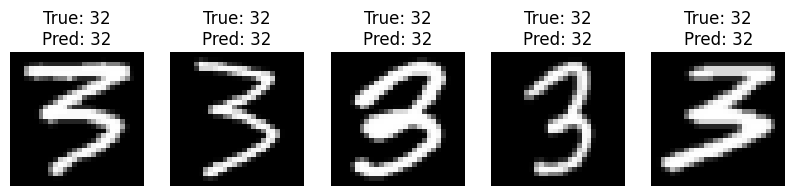

In [1]:
import numpy as np
import os
from sklearn import svm
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from PIL import Image

np.random.seed(42)

def load_images_from_folder(folder):
    """
    Carica le immagini PNG da una cartella e assegna un'etichetta basata sul nome del file.

    Args:
    - folder (str): Il percorso della cartella contenente le immagini.

    Returns:
    - images (list of np.ndarray): Lista di immagini caricate.
    - labels (list of int): Lista di etichette corrispondenti alle immagini.
    """
    images = []
    labels = []
    for filename in os.listdir(folder):
        if filename.endswith('.png'):
            img_path = os.path.join(folder, filename)
            img = Image.open(img_path).convert('L')  # Converti in scala di grigi
            img_array = np.array(img)
            if img_array.shape != (28, 28):  # Ridimensiona se necessario
                img = img.resize((28, 28))
                img_array = np.array(img)
            images.append(img_array.flatten())  # Appiattisci l'immagine in un array
            
            # Estrai l'etichetta dal nome del file
            label = int(filename.split('_')[0])  # Prendi la parte prima del primo underscore e convertilo in int
            labels.append(label)
    return images, labels

def load_data(parent_folder):
    """
    Carica e preprocessa i dati da una cartella principale contenente le immagini.

    Args:
    - parent_folder (str): Percorso alla cartella principale contenente le immagini.

    Returns:
    - X (np.ndarray): Dati delle immagini.
    - y (np.ndarray): Etichette delle immagini.
    """
    X = []
    y = []
    for label_folder in os.listdir(parent_folder):
        folder_path = os.path.join(parent_folder, label_folder)
        if os.path.isdir(folder_path):
            images, labels = load_images_from_folder(folder_path)
            X.extend(images)
            y.extend(labels)
    
    X = np.array(X)
    y = np.array(y)

    # Normalizzazione dei valori dei pixel da 0-255 a 0-1
    X = X / 255.0
    
    return X, y

def display_sample_results(X_test, y_test, y_pred, n_samples=5):
    fig, axes = plt.subplots(nrows=1, ncols=n_samples, figsize=(10, 5))
    for i in range(n_samples):
        ax = axes[i]
        ax.imshow(X_test[i].reshape(28, 28), cmap='gray')
        ax.set_title(f"True: {y_test[i]}\nPred: {y_pred[i]}")
        ax.axis('off')
    plt.show()

def main():
    # Percorsi alle cartelle di addestramento e test
    train_folder = 'data/emnist_train_images'
    test_folder = 'data/emnist_test_images'
    
    # Carica e preprocessa i dati
    X_train, y_train = load_data(train_folder)
    X_test, y_test = load_data(test_folder)
    
    # Addestramento del modello SVM con One-vs-Rest
    kernel_types = ['rbf']  # Tipi di kernel da utilizzare
    for kernel in kernel_types:
        print(f"Training SVM with {kernel} kernel...")
        model = OneVsRestClassifier(svm.SVC(kernel=kernel), n_jobs=-1)
        model.fit(X_train, y_train)
        
        # Valutazione del modello
        y_pred = model.predict(X_test)
        print(f"Classification report for {kernel} kernel:")
        print(classification_report(y_test, y_pred))
    
        # Visualizza alcuni risultati
        display_sample_results(X_test, y_test, y_pred)

if __name__ == "__main__":
    main()
